In [44]:
import pandas as pd  # used for data manipulation and handling tabular data(csv,excel etc.)
import numpy as np   # supports numerical operations
import matplotlib.pyplot as plt  # library for data visualization and plotting graphs
from sklearn.model_selection import train_test_split  #  splits dataset into training and testing subsets
from sklearn.preprocessing import LabelEncoder, StandardScaler # converts into numerical labels and for standardizing
from sklearn.ensemble import RandomForestClassifier  # ml model used for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # used for evaluating the model's performance


In [45]:
%pip install seaborn 

In [46]:
import seaborn as sns  # data visualization library based on Matplotlib

In [47]:
# Load dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
df.shape  # returns the dimensions of the dataframe as (rows, columns)

(891, 12)

In [50]:
df.columns  # returns Index object containing column labels in the dataframe

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
df.info() # gives concise summary of the dataframe (no.of non-null values, datatypes, memory usage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [52]:
df.head()  # displays first few rows (default : 5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
# Drop irrerelevant columns
df = df.drop(columns=["PassengerId","Name","Ticket","Cabin"])

In [54]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [55]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace= True) # using median bcz Age is numerical value and shouldn't be affected by outliers (when taking mean)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace =True) # using mode bcz its a categorical value ( filling with most frequent value )

<ipython-input-55-f178cee6e007>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace= True) # using median bcz Age is numerical value and shouldn't be affected by outliers (when taking mean)
<ipython-input-55-f178cee6e007>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [56]:
# Encode categorical features
encoder = LabelEncoder() # here using Label Encoding , but one-hot encoding will be a better one... (here converting categorical data to numerical data)
df['Sex'] = encoder.fit_transform(df['Sex']) # because ml model like RandomForest and logistic regression works with numerical data
df['Embarked'] = encoder.fit_transform(df['Embarked'])


In [57]:
# Define features and target 
X = df.drop(columns=['Survived']) # X is the feature and we removed target 'survived' from it
y = df['Survived'] # y is the target 

In [58]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42) # random_state ensures same split on each time for reproducibility

In [59]:
# Scale numerical features
scaler = StandardScaler() # applies feature scaling to standardize the dataset
X_train = scaler.fit_transform(X_train) # computes mean and std , then scales
X_test = scaler.transform(X_test) # uses same mean and std from training set


In [60]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state= 42) # creates 100 different trees each with different random subset of data
model.fit(X_train,y_train) # training the model 

RandomForestClassifier(random_state=42)

In [61]:
# Make Predictions
y_pred = model.predict(X_test) # using X_test predicts the output as y_pred(each tree predicts an output and majority will be taken as final prediction(y_pred))


In [62]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy : {accuracy: .2f}") # calculating the accuracy of the model (correct predictions / total predictions)
print("Classification Report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred)) # [[ TN , FP],[FN,TP]]


Model Accuracy :  0.82
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix :
 [[92 13]
 [19 55]]


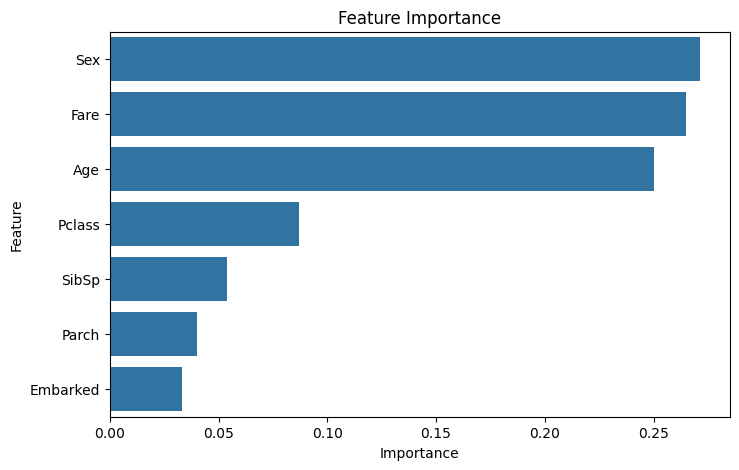

In [63]:
# Feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}) # plotting the features which is having high importance
feature_importances = feature_importances.sort_values(by='Importance', ascending = False)
plt.figure(figsize=(8,5))
sns.barplot(x= 'Importance', y= 'Feature', data= feature_importances)
plt.title('Feature Importance')
plt.show()

In [64]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [65]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [66]:
import joblib

In [67]:
# saved the trained model(ml model we created) and scaler(used for data pre-processing) for future use 
joblib.dump(model, 'titanic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')           

['scaler.pkl']

In [68]:
%pip install ipywidgets

In [69]:
# if you dont have model and scaler in this notebook, then you need to load it using...
# import joblib

# Load the trained model
# model = joblib.load("titanic_model.pkl")

# Load the scaler
# scaler = joblib.load("scaler.pkl")

In [71]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Define input widgets
pclass = widgets.IntSlider(value=3, min=1, max=3, step=1, description="Pclass:")
sex = widgets.Dropdown(options={"Male": 1, "Female": 0}, value=1, description="Sex:")
age = widgets.FloatSlider(value=30, min=0, max=80, step=1, description="Age:")
sibsp = widgets.IntSlider(value=0, min=0, max=8, step=1, description="SibSp:")
parch = widgets.IntSlider(value=0, min=0, max=6, step=1, description="Parch:")
fare = widgets.FloatSlider(value=15, min=0, max=500, step=1, description="Fare:")
embarked = widgets.Dropdown(options={"C": 0, "Q": 1, "S": 2}, value=2, description="Embarked:")

# Prediction function
def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked):
    passenger = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]])
    passenger_scaled = scaler.transform(passenger)  # Scale input using trained scaler
    prediction = model.predict(passenger_scaled)[0]
    
    result = "Survived 😊" if prediction == 1 else "Did Not Survive 😢"
    print(f"Prediction: {result}")

# Create button
button = widgets.Button(description="Predict")
output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        predict_survival(pclass.value, sex.value, age.value, sibsp.value, parch.value, fare.value, embarked.value)

button.on_click(on_button_click)

# Display widgets
display(pclass, sex, age, sibsp, parch, fare, embarked, button, output)


IntSlider(value=3, description='Pclass:', max=3, min=1)

Dropdown(description='Sex:', options={'Male': 1, 'Female': 0}, value=1)

FloatSlider(value=30.0, description='Age:', max=80.0, step=1.0)

IntSlider(value=0, description='SibSp:', max=8)

IntSlider(value=0, description='Parch:', max=6)

FloatSlider(value=15.0, description='Fare:', max=500.0, step=1.0)

Dropdown(description='Embarked:', index=2, options={'C': 0, 'Q': 1, 'S': 2}, value=2)

Button(description='Predict', style=ButtonStyle())

Output()